# WHOMP on MNIST via tSNE

In [1]:
cd /Users/shizhouxu/Desktop/SX_Workspace/WHOMP

/Users/shizhouxu/Desktop/SX_Workspace/WHOMP


/Users/shizhouxu/Desktop/SX_Workspace/diverse_subgroup_env/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from WHOMP import KMeansConstrained, WHOMP_Matching, WHOMP_Random, RandomPartition, Pocock_Simon_minimization
from WHOMP_Test import run_WHOMP_MNIST_experiment

## Loading Data

In [3]:
# data from sklearn datasets
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

# Extract data & target from the dataset
pixel_data, targets = data
targets = targets.astype(int)
x = pixel_data.values
y = targets.values

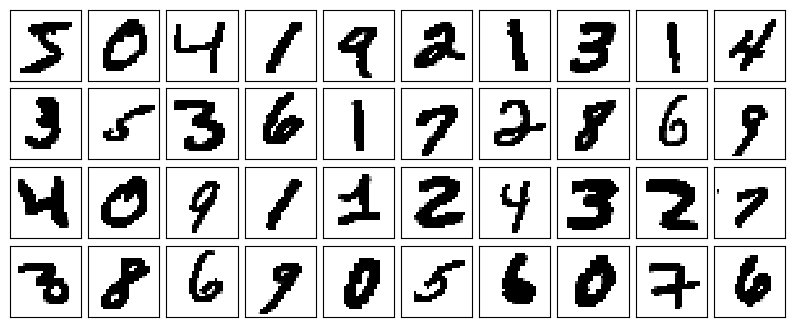

In [4]:
## Plotting the original train data

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

## tSNE Embedding

(70000, 784)


/Users/shizhouxu/Desktop/SX_Workspace/diverse_subgroup_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


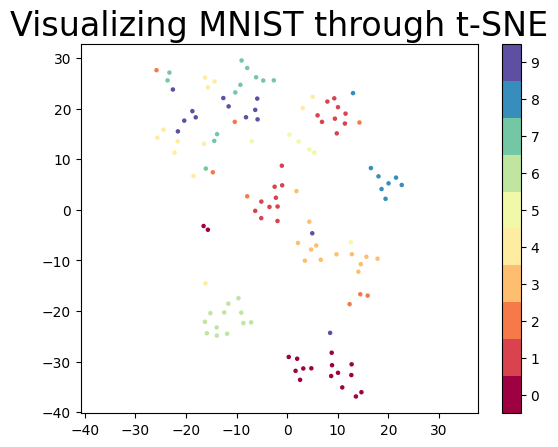

In [5]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 
x_subset = x[0:120]
y_subset = y[0:120]
label = y_subset

tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=10, n_iter=5000).fit_transform(x_subset)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through t-SNE', fontsize=24);

## Comparison Test on the Entropy of Subgroup True Labels

In [6]:
# data from sklearn datasets
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

# Extract data & target from the dataset
pixel_data, targets = data
targets = targets.astype(int)
x = pixel_data.values
y = targets.values

## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 
x_subset = x[0:120]
y_subset = y[0:120]
label = y_subset

tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=10, n_iter=5000).fit_transform(x_subset)

# Run the entropy experiment
ent_average_list, ent_std_list = run_WHOMP_MNIST_experiment(tsne, y_subset, repetition = 50)

(70000, 784)


/Users/shizhouxu/Desktop/SX_Workspace/diverse_subgroup_env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Data entropy: 0.9779699967596833

Average Entropy List: [(0.9631640388800846, 0.9629428949100199, 0.9720760067888053, 0.973350089284265), (0.9457051808096735, 0.9439861173830946, 0.9623758671860025, 0.9604478929896111), (0.9390785552113431, 0.9420949214283636, 0.9542944631462433, 0.9531807786842595)]

Standard Deviation List: [(0.013511554510217108, 0.011660463078205329, 0.00799352771603229, 0.009175748093503378), (0.02205575982416141, 0.02322829059822091, 0.013363943225597587, 0.012519915230986702), (0.02655152019247918, 0.023148646080069172, 0.01659781838556819, 0.018380814159625034)]
